# **`REGISTRATION SCHEME`**

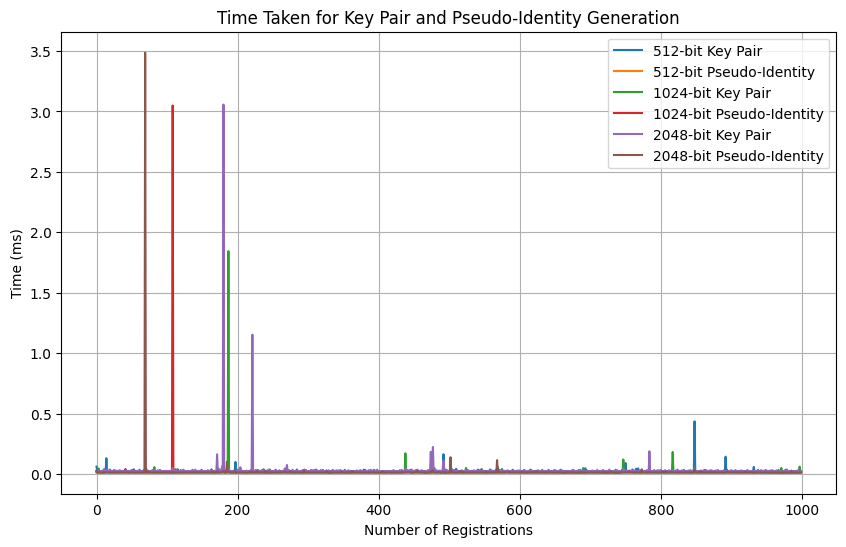

In [ ]:
import hashlib
import time
import random
import matplotlib.pyplot as plt

class UDCSystem:
    def __init__(self):
        self.evs = {}
        self.revocation_list = set()

    def register_ev(self, ev_name):
        # Step 1: Generate identity and timestamp
        ev_identity = ev_name
        ev_timestamp = str(int(time.time()))

        # Step 2: Verify timestamp
        # Adjust the allowed execution range according to your requirements
        if not self._is_within_execution_range(ev_timestamp):
            return "Registration failed. Timestamp is not within the allowed execution range."

        # Step 3: Check if EV identity exists in the database or revocation list
        if ev_identity in self.evs:
            return "Registration failed. EV identity already registered."
        if ev_identity in self.revocation_list:
            return "Registration failed. EV identity is illegal."

        # Step 4: Generate key pair
        start_time = time.time()
        public_key, private_key = self._generate_key_pair()
        end_time = time.time()
        key_pair_generation_time = (end_time - start_time) * 1000  # Convert to milliseconds

        # Step 5: Calculate pseudo-identity
        start_time = time.time()
        pseudo_identity = self._calculate_pseudo_identity(private_key, ev_identity)
        end_time = time.time()
        pseudo_identity_generation_time = (end_time - start_time) * 1000  # Convert to milliseconds

        # Step 6: Store EV information
        self.evs[ev_identity] = {
            "public_key": public_key,
            "pseudo_identity": pseudo_identity
        }

        return f"{ev_identity} registration successful."

    def _is_within_execution_range(self, timestamp):
        # Adjust the execution range logic according to your requirements
        return True

    def _generate_key_pair(self):
        # Generate key pair with bit length of 2048
        random.seed(42)
        private_key = random.getrandbits(2048)
        public_key = hashlib.sha1(str(private_key).encode()).hexdigest()
        return public_key, private_key

    def _calculate_pseudo_identity(self, private_key, identity):
        # Use a secure hash function, such as SHA-1, to calculate the pseudo-identity
        hash_input = str(private_key).encode() + identity.encode()
        pseudo_identity = hashlib.sha1(hash_input).hexdigest()
        return pseudo_identity

# Perform registrations and measure the time taken for key pair and pseudo-identity generation
num_registrations = 1000
bit_lengths = [512, 1024, 2048]
key_pair_generation_times = {512: [], 1024: [], 2048: []}
pseudo_identity_generation_times = {512: [], 1024: [], 2048: []}

udc_system = UDCSystem()

for i in range(num_registrations):
    for bit_length in bit_lengths:
        start_time = time.time()
        public_key, private_key = udc_system._generate_key_pair()
        end_time = time.time()
        key_pair_generation_time = (end_time - start_time) * 1000  # Convert to milliseconds
        key_pair_generation_times[bit_length].append(key_pair_generation_time)

        start_time = time.time()
        pseudo_identity = udc_system._calculate_pseudo_identity(private_key, f"EV{i}")
        end_time = time.time()
        pseudo_identity_generation_time = (end_time - start_time) * 1000  # Convert to milliseconds
        pseudo_identity_generation_times[bit_length].append(pseudo_identity_generation_time)

# Plot the graph
plt.figure(figsize=(10, 6))

for bit_length in bit_lengths:
    plt.plot(range(num_registrations), key_pair_generation_times[bit_length], label=f"{bit_length}-bit Key Pair")
    plt.plot(range(num_registrations), pseudo_identity_generation_times[bit_length], label=f"{bit_length}-bit Pseudo-Identity")

plt.title("Time Taken for Key Pair and Pseudo-Identity Generation")
plt.xlabel("Number of Registrations")
plt.ylabel("Time (ms)")
plt.legend()
plt.grid(True)
plt.show()


**ONE MORE THING ALL THESE ALGORITHMS ARE WORKING ON SHA-256 HASHING ALGORITHM.**

AS WE KNOW THAT AS THE KEYS SIZE INCREASES ITS GETS HARDER TO ENCRYPT AND DECRYPT THEM, HERE WE WILL SEE THE RUNTIME PERFORMANCE OF OUR REGISTRATION SCHEME AS FOR DIFFERENT KEY SIZEZ 512, 1024, 2048 BITS.

FOR THE KEYS AND PSEUDO-IDENTITIES TO BE IN 2048 BITS

Number of EVs: 10, Runtime: 688.12 ms
Number of EVs: 20, Runtime: 1296.26 ms
Number of EVs: 30, Runtime: 2251.10 ms
Number of EVs: 40, Runtime: 2702.41 ms
Number of EVs: 50, Runtime: 3749.90 ms
Number of EVs: 60, Runtime: 4644.10 ms
Number of EVs: 70, Runtime: 4878.49 ms
Number of EVs: 80, Runtime: 6671.09 ms
Number of EVs: 90, Runtime: 6031.91 ms
Number of EVs: 100, Runtime: 7985.50 ms


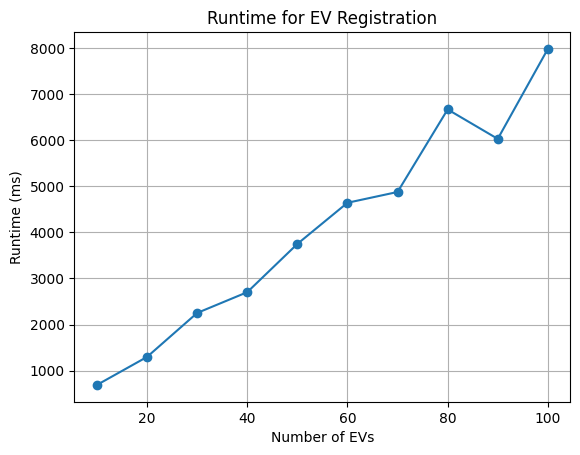

In [ ]:
import hashlib
import time
import matplotlib.pyplot as plt
from cryptography.hazmat.primitives.asymmetric import rsa
from cryptography.hazmat.primitives import serialization

class UDCSystem:
    def __init__(self):
        self.evs = {}
        self.css = {}
        self.rsus = {}
        self.revocation_list = set()

    def register_ev(self, ev_name, ev_timestamp):
        # Step 2: Verify timestamp
        if not self._is_within_execution_range(ev_timestamp):
            return "Registration failed. Timestamp is not within the allowed execution range."

        # Step 3: Check if EV identity exists in the database or revocation list
        if ev_name in self.evs:
            return "Registration failed. EV identity already registered."
        if ev_name in self.revocation_list:
            return "Registration failed. EV identity is illegal."

        # Step 4: Generate key pair
        public_key, private_key = self._generate_key_pair()

        # Step 5: Calculate pseudo-identity
        pseudo_identity = self._calculate_pseudo_identity(private_key, ev_name)

        # Step 6: Store EV information
        self.evs[ev_name] = {
            "public_key": public_key,
            "private_key": private_key,
            "pseudo_identity": pseudo_identity
        }

        public_key_pem = public_key.public_bytes(encoding=serialization.Encoding.PEM, format=serialization.PublicFormat.SubjectPublicKeyInfo).decode()
        private_key_pem = private_key.private_bytes(encoding=serialization.Encoding.PEM, format=serialization.PrivateFormat.PKCS8, encryption_algorithm=serialization.NoEncryption()).decode()

        return f"{ev_name} registration successful.\nPublic Key:\n{public_key_pem}\nPrivate Key:\n{private_key_pem}\nPseudo-Identity: {pseudo_identity}"

    def _is_within_execution_range(self, timestamp):
        # Adjust the execution range logic according to your requirements
        return True

    def _generate_key_pair(self):
        # Generate a 2048-bit RSA key pair
        private_key = rsa.generate_private_key(
            public_exponent=65537,
            key_size=2048
        )
        public_key = private_key.public_key()
        return public_key, private_key

    def _calculate_pseudo_identity(self, private_key, identity):
        # Use a secure hash function, such as SHA-256, to calculate the pseudo-identity
        hash_input = private_key.private_bytes(
            encoding=serialization.Encoding.PEM,
            format=serialization.PrivateFormat.PKCS8,
            encryption_algorithm=serialization.NoEncryption()
        ) + identity.encode()
        pseudo_identity = hashlib.sha256(hash_input).hexdigest()
        return pseudo_identity

# Function to measure the runtime for the given number of EVs
def measure_runtime(num_evs):
    udc_system = UDCSystem()

    ev_names = ["EV" + str(i) for i in range(1, num_evs + 1)]
    ev_timestamp = "2023-06-28T12:00:00"

    start_time = time.time()

    for ev_name in ev_names:
        ev_registration_result = udc_system.register_ev(ev_name, ev_timestamp)

    end_time = time.time()
    runtime = (end_time - start_time) * 1000  # Convert to milliseconds

    return runtime

# Measure the runtime for different numbers of EVs
num_evs_list = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
runtimes = []

for num_evs in num_evs_list:
    runtime = measure_runtime(num_evs)
    runtimes.append(runtime)

# Display the (Number of EVs, Runtime) values as output
for i in range(len(num_evs_list)):
    print(f"Number of EVs: {num_evs_list[i]}, Runtime: {runtimes[i]:.2f} ms")

# Plot the graph
plt.plot(num_evs_list, runtimes, marker='o')
plt.xlabel("Number of EVs")
plt.ylabel("Runtime (ms)")
plt.title("Runtime for EV Registration")
plt.grid(True)
plt.show()


FOR THE KEYS AND PSEUDO-IDENTITIES TO BE IN 1024 BITS

Number of EVs: 10, Runtime: 144.40 ms
Number of EVs: 20, Runtime: 244.99 ms
Number of EVs: 30, Runtime: 355.94 ms
Number of EVs: 40, Runtime: 535.86 ms
Number of EVs: 50, Runtime: 617.54 ms
Number of EVs: 60, Runtime: 805.05 ms
Number of EVs: 70, Runtime: 863.27 ms
Number of EVs: 80, Runtime: 985.53 ms
Number of EVs: 90, Runtime: 1103.66 ms
Number of EVs: 100, Runtime: 1181.85 ms


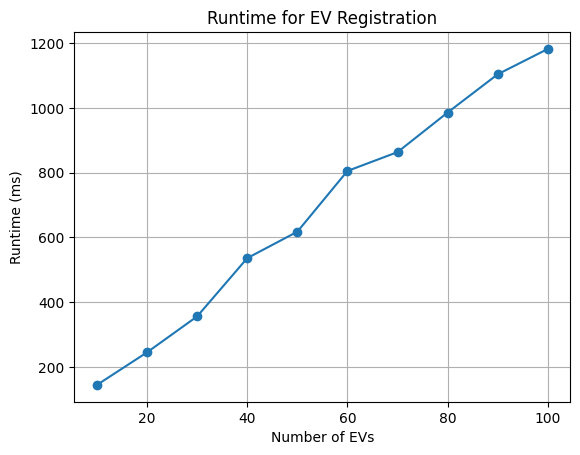

In [ ]:
import hashlib
import time
import matplotlib.pyplot as plt
from cryptography.hazmat.primitives.asymmetric import rsa
from cryptography.hazmat.primitives import serialization

class UDCSystem:
    def __init__(self):
        self.evs = {}
        self.css = {}
        self.rsus = {}
        self.revocation_list = set()

    def register_ev(self, ev_name, ev_timestamp):
        # Step 2: Verify timestamp
        if not self._is_within_execution_range(ev_timestamp):
            return "Registration failed. Timestamp is not within the allowed execution range."

        # Step 3: Check if EV identity exists in the database or revocation list
        if ev_name in self.evs:
            return "Registration failed. EV identity already registered."
        if ev_name in self.revocation_list:
            return "Registration failed. EV identity is illegal."

        # Step 4: Generate key pair
        public_key, private_key = self._generate_key_pair()

        # Step 5: Calculate pseudo-identity
        pseudo_identity = self._calculate_pseudo_identity(private_key, ev_name)

        # Step 6: Store EV information
        self.evs[ev_name] = {
            "public_key": public_key,
            "private_key": private_key,
            "pseudo_identity": pseudo_identity
        }

        public_key_pem = public_key.public_bytes(encoding=serialization.Encoding.PEM, format=serialization.PublicFormat.SubjectPublicKeyInfo).decode()
        private_key_pem = private_key.private_bytes(encoding=serialization.Encoding.PEM, format=serialization.PrivateFormat.PKCS8, encryption_algorithm=serialization.NoEncryption()).decode()

        return f"{ev_name} registration successful.\nPublic Key:\n{public_key_pem}\nPrivate Key:\n{private_key_pem}\nPseudo-Identity: {pseudo_identity}"

    def _is_within_execution_range(self, timestamp):
        # Adjust the execution range logic according to your requirements
        return True

    def _generate_key_pair(self):
        # Generate a 1024-bit RSA key pair
        private_key = rsa.generate_private_key(
            public_exponent=65537,
            key_size=1024
        )
        public_key = private_key.public_key()
        return public_key, private_key

    def _calculate_pseudo_identity(self, private_key, identity):
        # Use a secure hash function, such as SHA-256, to calculate the pseudo-identity
        hash_input = private_key.private_bytes(
            encoding=serialization.Encoding.PEM,
            format=serialization.PrivateFormat.PKCS8,
            encryption_algorithm=serialization.NoEncryption()
        ) + identity.encode()
        pseudo_identity = hashlib.sha256(hash_input).hexdigest()
        return pseudo_identity

# Function to measure the runtime for the given number of EVs
def measure_runtime(num_evs):
    udc_system = UDCSystem()

    ev_names = ["EV" + str(i) for i in range(1, num_evs + 1)]
    ev_timestamp = "2023-06-28T12:00:00"

    start_time = time.time()

    for ev_name in ev_names:
        ev_registration_result = udc_system.register_ev(ev_name, ev_timestamp)

    end_time = time.time()
    runtime = (end_time - start_time) * 1000  # Convert to milliseconds

    return runtime

# Measure the runtime for different numbers of EVs
num_evs_list = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
runtimes = []

for num_evs in num_evs_list:
    runtime = measure_runtime(num_evs)
    runtimes.append(runtime)

# Display the (Number of EVs, Runtime) values as output
for i in range(len(num_evs_list)):
    print(f"Number of EVs: {num_evs_list[i]}, Runtime: {runtimes[i]:.2f} ms")

# Plot the graph
plt.plot(num_evs_list, runtimes, marker='o')
plt.xlabel("Number of EVs")
plt.ylabel("Runtime (ms)")
plt.title("Runtime for EV Registration")
plt.grid(True)
plt.show()


FOR THE KEYS AND PSEUDO-IDENTITIES TO BE IN 512 BITS

Number of EVs: 10, Runtime: 49.33 ms
Number of EVs: 20, Runtime: 95.82 ms
Number of EVs: 30, Runtime: 142.78 ms
Number of EVs: 40, Runtime: 185.90 ms
Number of EVs: 50, Runtime: 243.84 ms
Number of EVs: 60, Runtime: 284.47 ms
Number of EVs: 70, Runtime: 336.03 ms
Number of EVs: 80, Runtime: 370.36 ms
Number of EVs: 90, Runtime: 443.18 ms
Number of EVs: 100, Runtime: 466.87 ms


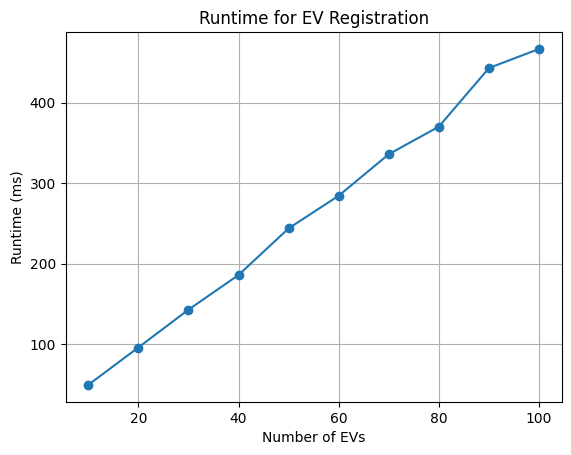

In [ ]:
import hashlib
import time
import matplotlib.pyplot as plt
from cryptography.hazmat.primitives.asymmetric import rsa
from cryptography.hazmat.primitives import serialization

class UDCSystem:
    def __init__(self):
        self.evs = {}
        self.css = {}
        self.rsus = {}
        self.revocation_list = set()

    def register_ev(self, ev_name, ev_timestamp):
        # Step 2: Verify timestamp
        if not self._is_within_execution_range(ev_timestamp):
            return "Registration failed. Timestamp is not within the allowed execution range."

        # Step 3: Check if EV identity exists in the database or revocation list
        if ev_name in self.evs:
            return "Registration failed. EV identity already registered."
        if ev_name in self.revocation_list:
            return "Registration failed. EV identity is illegal."

        # Step 4: Generate key pair
        public_key, private_key = self._generate_key_pair()

        # Step 5: Calculate pseudo-identity
        pseudo_identity = self._calculate_pseudo_identity(private_key, ev_name)

        # Step 6: Store EV information
        self.evs[ev_name] = {
            "public_key": public_key,
            "private_key": private_key,
            "pseudo_identity": pseudo_identity
        }

        public_key_pem = public_key.public_bytes(encoding=serialization.Encoding.PEM, format=serialization.PublicFormat.SubjectPublicKeyInfo).decode()
        private_key_pem = private_key.private_bytes(encoding=serialization.Encoding.PEM, format=serialization.PrivateFormat.PKCS8, encryption_algorithm=serialization.NoEncryption()).decode()

        return f"{ev_name} registration successful.\nPublic Key:\n{public_key_pem}\nPrivate Key:\n{private_key_pem}\nPseudo-Identity: {pseudo_identity}"

    def _is_within_execution_range(self, timestamp):
        # Adjust the execution range logic according to your requirements
        return True

    def _generate_key_pair(self):
        # Generate a 512-bit RSA key pair
        private_key = rsa.generate_private_key(
            public_exponent=65537,
            key_size=512
        )
        public_key = private_key.public_key()
        return public_key, private_key

    def _calculate_pseudo_identity(self, private_key, identity):
        # Use a secure hash function, such as SHA-256, to calculate the pseudo-identity
        hash_input = private_key.private_bytes(
            encoding=serialization.Encoding.PEM,
            format=serialization.PrivateFormat.PKCS8,
            encryption_algorithm=serialization.NoEncryption()
        ) + identity.encode()
        pseudo_identity = hashlib.sha256(hash_input).hexdigest()
        return pseudo_identity

# Function to measure the runtime for the given number of EVs
def measure_runtime(num_evs):
    udc_system = UDCSystem()

    ev_names = ["EV" + str(i) for i in range(1, num_evs + 1)]
    ev_timestamp = "2023-06-28T12:00:00"

    start_time = time.time()

    for ev_name in ev_names:
        ev_registration_result = udc_system.register_ev(ev_name, ev_timestamp)

    end_time = time.time()
    runtime = (end_time - start_time) * 1000  # Convert to milliseconds

    return runtime

# Measure the runtime for different numbers of EVs
num_evs_list = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
runtimes = []

for num_evs in num_evs_list:
    runtime = measure_runtime(num_evs)
    runtimes.append(runtime)

# Display the (Number of EVs, Runtime) values as output
for i in range(len(num_evs_list)):
    print(f"Number of EVs: {num_evs_list[i]}, Runtime: {runtimes[i]:.2f} ms")

# Plot the graph
plt.plot(num_evs_list, runtimes, marker='o')
plt.xlabel("Number of EVs")
plt.ylabel("Runtime (ms)")
plt.title("Runtime for EV Registration")
plt.grid(True)
plt.show()



HERE WE HAVE A COMBINED GRAPH FOR THE RUNTIME OF DIFFERENT KEYS SIZES AND AS THE NUMBER OF EVS REGISTRATIONS INCREASES.

FOR THE KEYS ADN PSEUDO IDENTITIES TO BE GENERATED USING SHA-256 HASHING ALGORITHM

Number of EVs: 10, Runtime (512 bits): 101.84 ms
Number of EVs: 10, Runtime (1024 bits): 119.87 ms
Number of EVs: 10, Runtime (2048 bits): 882.43 ms

Number of EVs: 20, Runtime (512 bits): 390.27 ms
Number of EVs: 20, Runtime (1024 bits): 236.17 ms
Number of EVs: 20, Runtime (2048 bits): 857.27 ms

Number of EVs: 30, Runtime (512 bits): 218.65 ms
Number of EVs: 30, Runtime (1024 bits): 314.00 ms
Number of EVs: 30, Runtime (2048 bits): 2316.56 ms

Number of EVs: 40, Runtime (512 bits): 181.05 ms
Number of EVs: 40, Runtime (1024 bits): 476.06 ms
Number of EVs: 40, Runtime (2048 bits): 2712.27 ms

Number of EVs: 50, Runtime (512 bits): 264.58 ms
Number of EVs: 50, Runtime (1024 bits): 581.80 ms
Number of EVs: 50, Runtime (2048 bits): 3215.12 ms

Number of EVs: 60, Runtime (512 bits): 283.33 ms
Number of EVs: 60, Runtime (1024 bits): 680.17 ms
Number of EVs: 60, Runtime (2048 bits): 4867.76 ms

Number of EVs: 70, Runtime (512 bits): 348.21 ms
Number of EVs: 70, Runtime (1024 bits): 820.82 

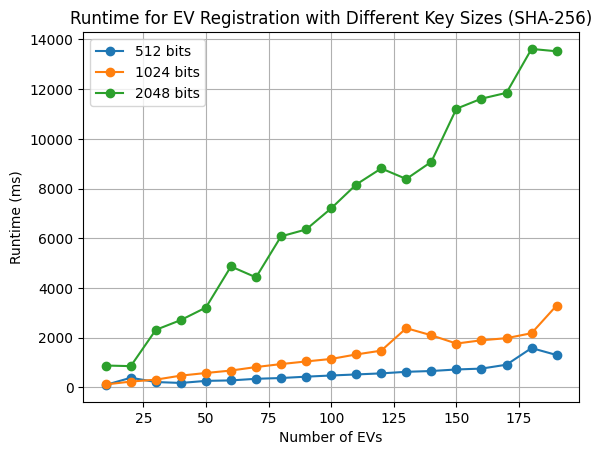

In [ ]:
import hashlib
import time
import matplotlib.pyplot as plt
from cryptography.hazmat.primitives.asymmetric import rsa
from cryptography.hazmat.primitives import serialization

class UDCSystem:
    def __init__(self):
        self.evs = {}
        self.css = {}
        self.revocation_list = set()

    def register_ev(self, ev_name, ev_timestamp, key_size):
        # Step 2: Verify timestamp
        # Adjust the allowed execution range according to your requirements
        if not self._is_within_execution_range(ev_timestamp):
            return "Registration failed. Timestamp is not within the allowed execution range."

        # Step 3: Check if EV identity exists in the database or revocation list
        if ev_name in self.evs:
            return "Registration failed. EV identity already registered."
        if ev_name in self.revocation_list:
            return "Registration failed. EV identity is illegal."

        # Step 4: Generate key pair
        public_key, private_key = self._generate_key_pair(key_size)

        # Step 5: Calculate pseudo-identity
        pseudo_identity = self._calculate_pseudo_identity(private_key, ev_name)

        # Step 6: Store EV information
        self.evs[ev_name] = {
            "public_key": public_key,
            "pseudo_identity": pseudo_identity
        }

        return f"{ev_name} registration successful."

    def _is_within_execution_range(self, timestamp):
        # Adjust the execution range logic according to your requirements
        return True

    def _generate_key_pair(self, key_size):
        # Replace this with your key pair generation logic
        private_key = rsa.generate_private_key(
            public_exponent=65537,
            key_size=key_size
        )
        public_key = private_key.public_key()

        return public_key, private_key

    def _calculate_pseudo_identity(self, private_key, identity):
        # Use a secure hash function, such as SHA-256, to calculate the pseudo-identity
        hash_input = private_key.private_bytes(
            encoding=serialization.Encoding.PEM,
            format=serialization.PrivateFormat.PKCS8,
            encryption_algorithm=serialization.NoEncryption()
        ) + identity.encode()

        pseudo_identity = hashlib.sha256(hash_input).hexdigest()
        return pseudo_identity

# Function to measure the runtime for the given number of EVs and key size
def measure_runtime(num_evs, key_size):
    udc_system = UDCSystem()

    ev_names = ["EV" + str(i) for i in range(1, num_evs + 1)]
    ev_timestamp = "2023-06-28T12:00:00"

    start_time = time.time()

    for ev_name in ev_names:
        ev_registration_result = udc_system.register_ev(ev_name, ev_timestamp, key_size)

    end_time = time.time()
    runtime = (end_time - start_time) * 1000  # Convert to milliseconds

    return runtime

# Measure the runtime for different numbers of EVs and key sizes
num_evs = list(range(10, 200, 10))
key_sizes = [512, 1024, 2048]

runtimes_512 = []
runtimes_1024 = []
runtimes_2048 = []

for key_size in key_sizes:
    runtimes = []
    for num_ev in num_evs:
        runtime = measure_runtime(num_ev, key_size)
        runtimes.append(runtime)

    if key_size == 512:
        runtimes_512 = runtimes
    elif key_size == 1024:
        runtimes_1024 = runtimes
    elif key_size == 2048:
        runtimes_2048 = runtimes

# Display the (Number of EVs, Runtime) values as output
for i in range(len(num_evs)):
    print(f"Number of EVs: {num_evs[i]}, Runtime (512 bits): {runtimes_512[i]:.2f} ms")
    print(f"Number of EVs: {num_evs[i]}, Runtime (1024 bits): {runtimes_1024[i]:.2f} ms")
    print(f"Number of EVs: {num_evs[i]}, Runtime (2048 bits): {runtimes_2048[i]:.2f} ms")
    print()

# Plotting the graph
plt.plot(num_evs, runtimes_512, marker='o', label="512 bits")
plt.plot(num_evs, runtimes_1024, marker='o', label="1024 bits")
plt.plot(num_evs, runtimes_2048, marker='o', label="2048 bits")

plt.xlabel("Number of EVs")
plt.ylabel("Runtime (ms)")
plt.title("Runtime for EV Registration with Different Key Sizes (SHA-256)")
plt.legend()
plt.grid(True)
plt.show()


FOR THE KEYS ADN PSEUDO IDENTITIES TO BE GENERATED USING SHA-1 HASHING ALGORITHM

Number of EVs: 10, Runtime (512 bits): 80.69 ms
Number of EVs: 10, Runtime (1024 bits): 109.70 ms
Number of EVs: 10, Runtime (2048 bits): 969.58 ms

Number of EVs: 20, Runtime (512 bits): 91.77 ms
Number of EVs: 20, Runtime (1024 bits): 284.49 ms
Number of EVs: 20, Runtime (2048 bits): 2043.07 ms

Number of EVs: 30, Runtime (512 bits): 148.38 ms
Number of EVs: 30, Runtime (1024 bits): 362.75 ms
Number of EVs: 30, Runtime (2048 bits): 2071.71 ms

Number of EVs: 40, Runtime (512 bits): 195.82 ms
Number of EVs: 40, Runtime (1024 bits): 712.78 ms
Number of EVs: 40, Runtime (2048 bits): 2692.81 ms

Number of EVs: 50, Runtime (512 bits): 236.19 ms
Number of EVs: 50, Runtime (1024 bits): 1253.08 ms
Number of EVs: 50, Runtime (2048 bits): 3267.00 ms

Number of EVs: 60, Runtime (512 bits): 391.64 ms
Number of EVs: 60, Runtime (1024 bits): 3071.86 ms
Number of EVs: 60, Runtime (2048 bits): 5444.76 ms

Number of EVs: 70, Runtime (512 bits): 375.93 ms
Number of EVs: 70, Runtime (1024 bits): 1586.1

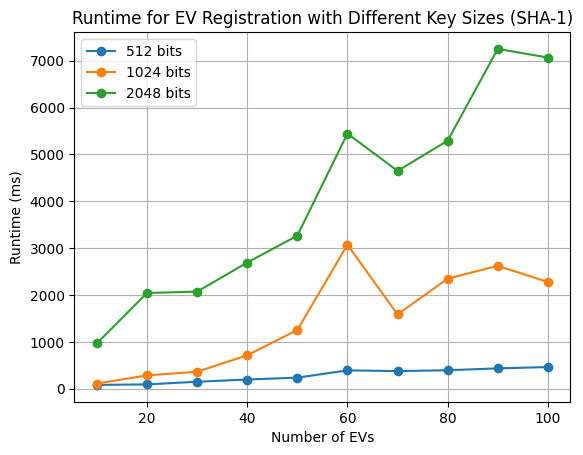

In [ ]:
import hashlib
import time
import matplotlib.pyplot as plt
from cryptography.hazmat.primitives.asymmetric import rsa
from cryptography.hazmat.primitives import serialization

class UDCSystem:
    def __init__(self):
        self.evs = {}
        self.css = {}
        self.revocation_list = set()

    def register_ev(self, ev_name, ev_timestamp, key_size):
        # Step 2: Verify timestamp
        # Adjust the allowed execution range according to your requirements
        if not self._is_within_execution_range(ev_timestamp):
            return "Registration failed. Timestamp is not within the allowed execution range."

        # Step 3: Check if EV identity exists in the database or revocation list
        if ev_name in self.evs:
            return "Registration failed. EV identity already registered."
        if ev_name in self.revocation_list:
            return "Registration failed. EV identity is illegal."

        # Step 4: Generate key pair
        public_key, private_key = self._generate_key_pair(key_size)

        # Step 5: Calculate pseudo-identity
        pseudo_identity = self._calculate_pseudo_identity(private_key, ev_name)

        # Step 6: Store EV information
        self.evs[ev_name] = {
            "public_key": public_key,
            "pseudo_identity": pseudo_identity
        }

        return f"{ev_name} registration successful."

    def _is_within_execution_range(self, timestamp):
        # Adjust the execution range logic according to your requirements
        return True

    def _generate_key_pair(self, key_size):
        # Replace this with your key pair generation logic
        private_key = rsa.generate_private_key(
            public_exponent=65537,
            key_size=key_size
        )
        public_key = private_key.public_key()

        return public_key, private_key

    def _calculate_pseudo_identity(self, private_key, identity):
        # Use a secure hash function, such as SHA-1, to calculate the pseudo-identity
        hash_input = private_key.private_bytes(
            encoding=serialization.Encoding.PEM,
            format=serialization.PrivateFormat.PKCS8,
            encryption_algorithm=serialization.NoEncryption()
        ) + identity.encode()

        pseudo_identity = hashlib.sha1(hash_input).hexdigest()
        return pseudo_identity

# Function to measure the runtime for the given number of EVs and key size
def measure_runtime(num_evs, key_size):
    udc_system = UDCSystem()

    ev_names = ["EV" + str(i) for i in range(1, num_evs + 1)]
    ev_timestamp = "2023-06-28T12:00:00"

    start_time = time.time()

    for ev_name in ev_names:
        ev_registration_result = udc_system.register_ev(ev_name, ev_timestamp, key_size)

    end_time = time.time()
    runtime = (end_time - start_time) * 1000  # Convert to milliseconds

    return runtime

# Measure the runtime for different numbers of EVs and key sizes
num_evs = list(range(10, 101, 10))
key_sizes = [512, 1024, 2048]

runtimes_512 = []
runtimes_1024 = []
runtimes_2048 = []

for key_size in key_sizes:
    runtimes = []
    for num_ev in num_evs:
        runtime = measure_runtime(num_ev, key_size)
        runtimes.append(runtime)

    if key_size == 512:
        runtimes_512 = runtimes
    elif key_size == 1024:
        runtimes_1024 = runtimes
    elif key_size == 2048:
        runtimes_2048 = runtimes

# Display the (Number of EVs, Runtime) values as output
for i in range(len(num_evs)):
    print(f"Number of EVs: {num_evs[i]}, Runtime (512 bits): {runtimes_512[i]:.2f} ms")
    print(f"Number of EVs: {num_evs[i]}, Runtime (1024 bits): {runtimes_1024[i]:.2f} ms")
    print(f"Number of EVs: {num_evs[i]}, Runtime (2048 bits): {runtimes_2048[i]:.2f} ms")
    print()

# Plotting the graph
plt.plot(num_evs, runtimes_512, marker='o', label="512 bits")
plt.plot(num_evs, runtimes_1024, marker='o', label="1024 bits")
plt.plot(num_evs, runtimes_2048, marker='o', label="2048 bits")

plt.xlabel("Number of EVs")
plt.ylabel("Runtime (ms)")
plt.title("Runtime for EV Registration with Different Key Sizes (SHA-1)")
plt.legend()
plt.grid(True)
plt.show()


# **CONCLUSION** :  
512 bits	Low-strength key  
1024 bits	Medium-strength key  
2048 bits	High-strength key  
4096 bits	Very high-strength key                                              
Key strength considerations: Shorter keys of the ECC type, which are generated when you specify NISTECC or BPECC, achieve comparable key strengths when compared with longer RSA keys.                                                
The current gives a comparison of SHA-1 and SHA-256 cryptographic hash functions. Important is that comparison is very dependant on specific implementation, the specific purpose of use (generate a secure token to be sent with API call). It is SHA-1 to be avoided as they are compromised and not secure. If their speed for given context is several times faster than secure SHA-2 ones and security is not that much important they can be chosen though. When choosing cryptographic hash function everything is up to a context of usage and benchmark tests for this context is needed.